## EDA for detection dataset

In [7]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Paths for images and labels folders

In [8]:
IMAGES_TYPE = "training"
# IMAGES_TYPE = "validation"

DATASET_BASE_DIR = os.getcwd()
IMG_BASE_DIR = os.path.join(DATASET_BASE_DIR, IMAGES_TYPE, "images")
LABEL_BASE_DIR = os.path.join(DATASET_BASE_DIR, IMAGES_TYPE, "labels")

In [9]:
# there are labels and images with exact same file names

img_files = os.listdir(IMG_BASE_DIR)
img_files.sort()

label_files = os.listdir(LABEL_BASE_DIR)
label_files.sort()

img_paths = [os.path.join(IMG_BASE_DIR, path) for path in img_files]
label_paths = [os.path.join(LABEL_BASE_DIR, path) for path in label_files]

# removing the .DS_Store files if they exist
img_paths = list(filter(lambda path: path.split("/")[-1] != ".DS_Store", img_paths))
label_paths = list(filter(lambda path: path.split("/")[-1] != ".DS_Store", label_paths))

In [10]:
# creating a list of label lists
label_raw_bboxes = []

for path in label_paths:
    with open(path) as f:
        raw_annotations = f.readlines()

        current_img_annotations = []
        for annotation in raw_annotations:
            yolo_bbox_raw = [float(val) for val in annotation[:-1].split(" ")] # removes the '\n' from the string entry
            yolo_bbox_raw[0] = int(yolo_bbox_raw[0]) # 0th index holds the class
            
            current_img_annotations.append(yolo_bbox_raw)
            
        label_raw_bboxes.append(current_img_annotations)

### Bounding box format conversion and plotting utils

In [11]:
def yolo_to_bbox(bbox):
    """
    The bounding box labels are in YOLO format but cv2 uses (x_min, y_min, x_max, y_max)
    format for plotting. So this functions helps convert amongst them.

    For more information about the YOLO bbox format, refer to this - https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/#yolo
    """
    x_min, y_min = bbox[0] - bbox[2]/2, bbox[1] - bbox[3]/2
    x_max, y_max = bbox[0] + bbox[2]/2, bbox[1] + bbox[3]/2

    return x_min, y_min, x_max, y_max


def plot_bbox(image, bbox_list):
    """
    Params:
    ------
    image - PIL Image object
    bbox - A list of lists of the form [[x_min, y_min, x_max, y_max], [...]]
    """
    w, h = image.size
    image = np.array(image)

    for bbox in bbox_list:
        x1, y1, x2, y2 = bbox
        
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255, 0, 0), thickness=5)

    return image

### Visualizing the Annotated Images (This takes a few seconds)

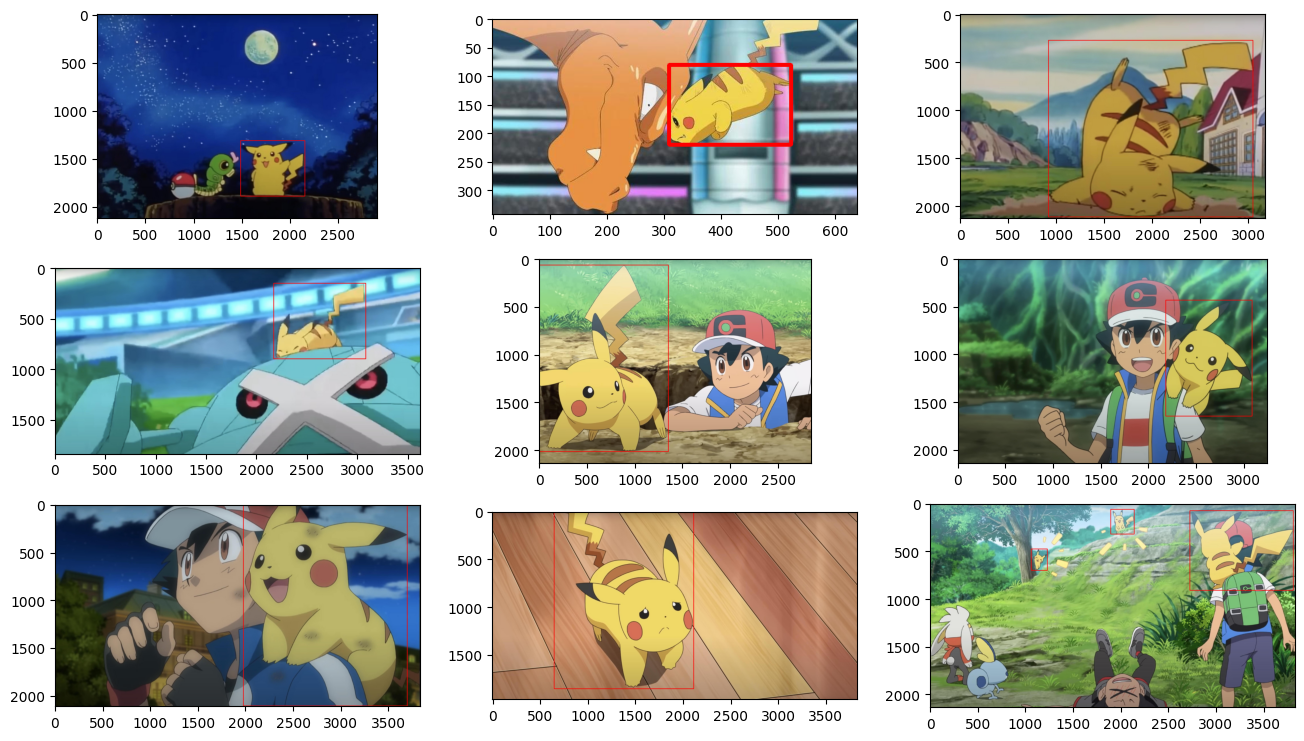

In [12]:
fig = plt.figure(figsize=(16, 9))
plt.axis('off')

rows = 3
cols = 3

for plot_idx in range(1, cols * rows + 1):
    img_idx = np.random.randint(len(img_paths), size=1)[0]
    img = Image.open(img_paths[img_idx])

    # ignoring the class at 0th index since there is only one class
    curr_raw_bboxes = [bbox[1:] for bbox in label_raw_bboxes[img_idx]]
    formatted_bboxes = [yolo_to_bbox(bbox) for bbox in curr_raw_bboxes]
    annotated_img = plot_bbox(img, formatted_bboxes)
    
    fig.add_subplot(3, 3, plot_idx)
    plt.imshow(annotated_img)

plt.show()